In [1]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
#df = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt", header=None, names=col_names)
df_har = pd.read_csv(r"C:\Users\asus\Downloads\Ho_gayaaaaaaaaaaaaa\WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt", error_bad_lines=False,header = None, names = columns)   

b'Skipping line 134634: expected 6 fields, saw 11\nSkipping line 197687: expected 6 fields, saw 11\n'
b'Skipping line 273261: expected 6 fields, saw 11\nSkipping line 371932: expected 6 fields, saw 11\n'
b'Skipping line 711484: expected 6 fields, saw 11\n'
b'Skipping line 832903: expected 6 fields, saw 7\nSkipping line 832904: expected 6 fields, saw 7\nSkipping line 832905: expected 6 fields, saw 7\nSkipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: expected 6 fields, saw 7\nSkipping line 832914: expected 6 fields, saw 7\nSkipping line 832915: expected 6 fields, saw 7\nSkipping line 832916: expected 6 fields, saw 7\nSkipping line 832917: expected 6 fields, saw 7\nSkipping line 832918:

In [3]:
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.69;
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.73;
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.69;
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.73;


In [4]:
# removing null values
df_har = df_har.dropna()
df_har.shape



(1086465, 6)

In [5]:
df_har.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086465 non-null  int64  
 1   activity   1086465 non-null  object 
 2   timestamp  1086465 non-null  int64  
 3   x-axis     1086465 non-null  float64
 4   y-axis     1086465 non-null  float64
 5   z-axis     1086465 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ MB


In [6]:
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))


In [7]:
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

# Exploratory Data Analysis

In [8]:
countofActivity = df['activity'].value_counts()
countofActivity

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64

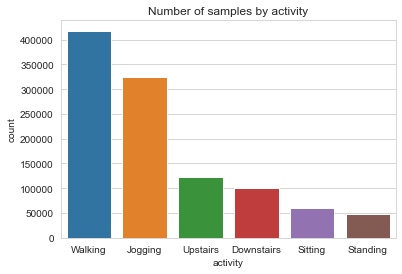

In [9]:
sns.set_style("whitegrid")
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

In [10]:
countofActivityperPerson=df['user'].value_counts()
print(countofActivityperPerson)
totalactivity=countofActivityperPerson.sum()
print("Total no. of activity : ",str(totalactivity))

20    54294
19    45382
31    44282
8     41187
14    38192
29    36768
13    36063
34    35947
3     35158
10    34875
27    33456
32    33357
12    32641
26    32578
36    32108
18    31705
11    31658
7     30967
1     29978
33    29453
6     28703
5     28509
15    26082
24    25736
23    25673
30    25334
21    23703
2     23525
35    22394
22    22308
17    22020
28    21358
16    20469
25    13468
9     12923
4     11369
Name: user, dtype: int64
Total no. of activity :  1073623


It can be seen, there is a significant class imbalance here with the majority of the samples having class-label ‘Walking’ and ‘Jogging’. ‘Sitting’ and ‘Standing’ activities have the least representation in the dataset.

<AxesSubplot:title={'center':'Training examples ny user'}>

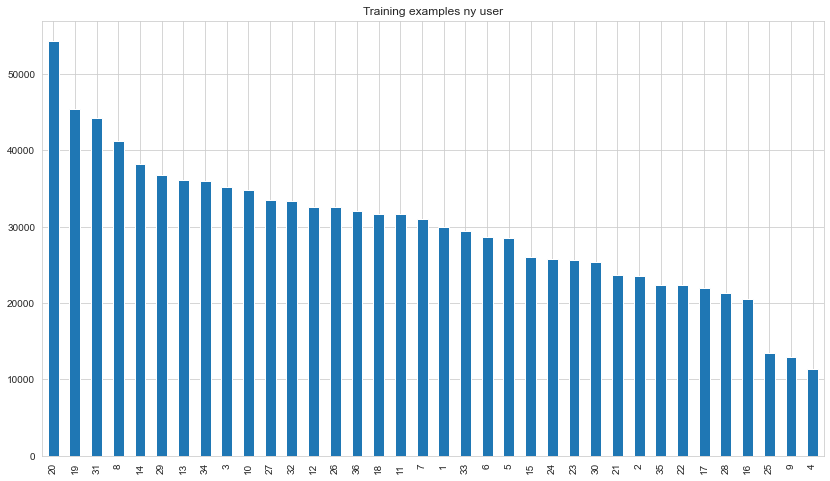

In [11]:
countofActivityperPerson.plot(kind='bar', title='Training examples ny user',figsize=(14,8))

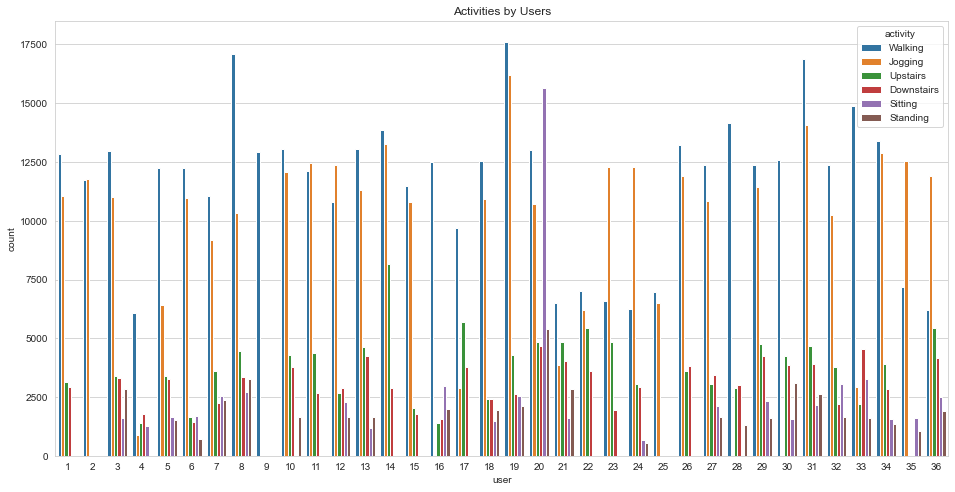

In [12]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'user',  hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

# How accelerometer data looks visually

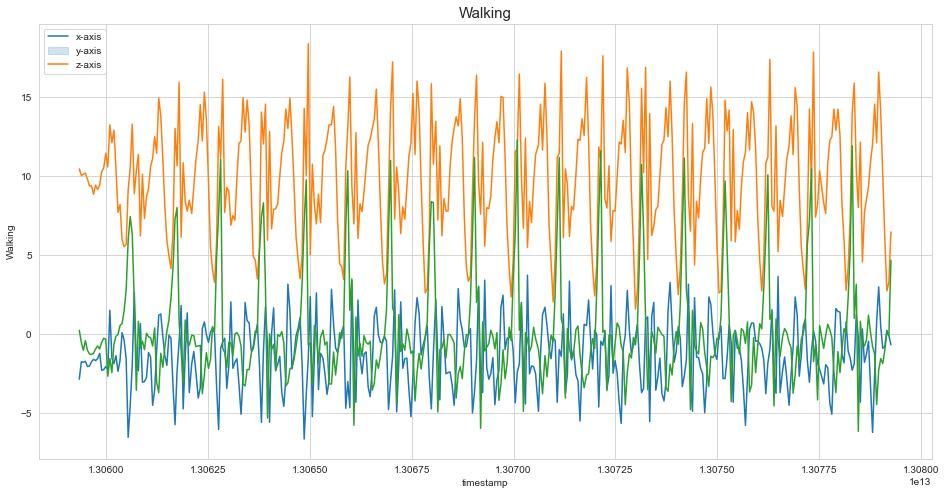

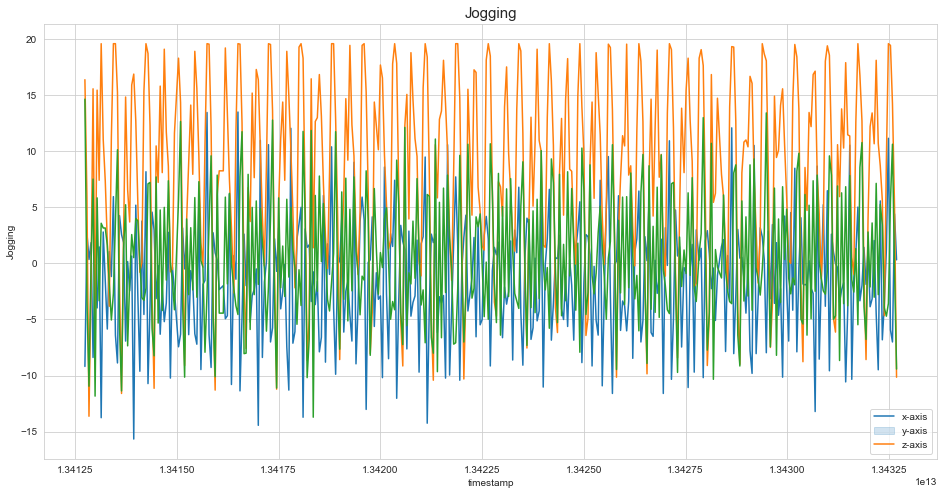

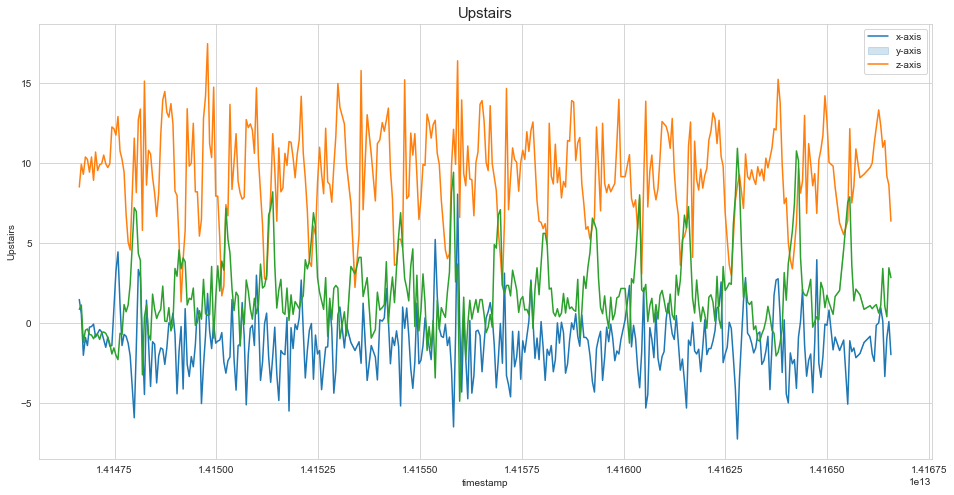

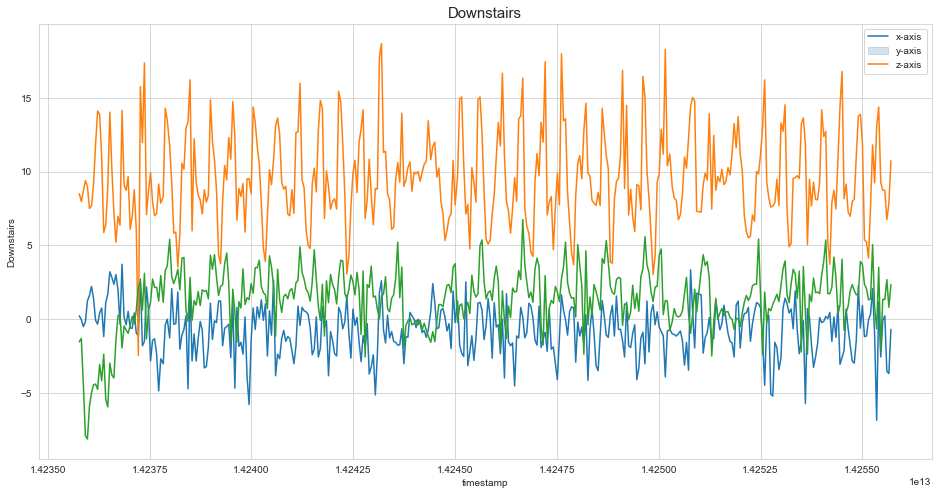

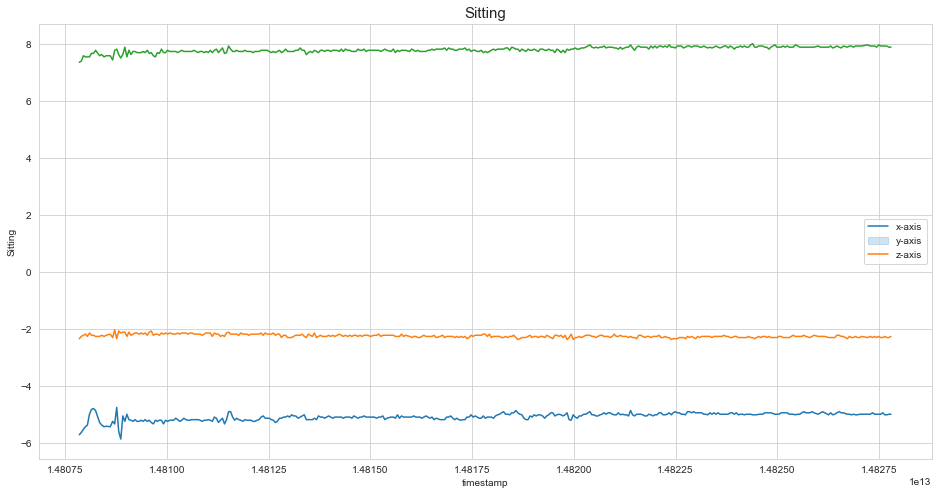

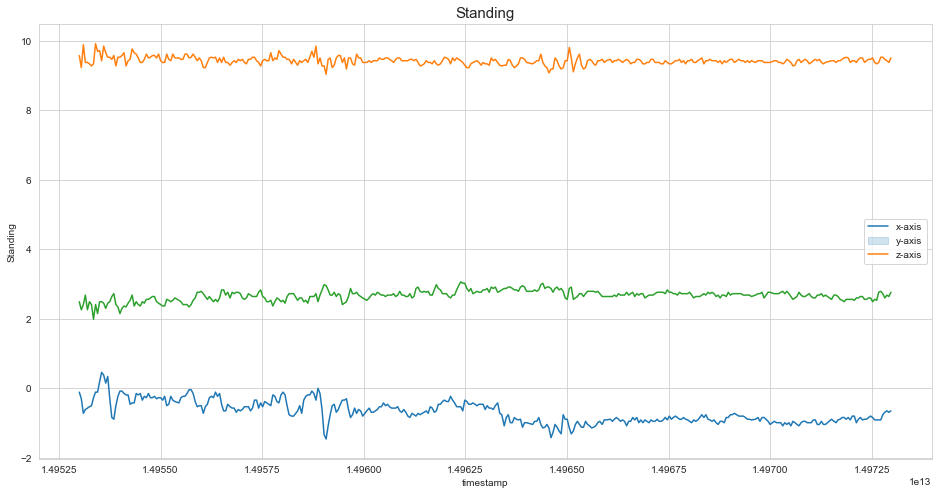

In [13]:
activities = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
for i in activities:
    plt.figure(figsize = (16,8))
    data36 = df[(df['user'] == 36) & (df['activity'] == i)][:400]
    sns.lineplot(y = 'x-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'y-axis', x = 'timestamp', data = data36)
    sns.lineplot(y = 'z-axis', x = 'timestamp', data = data36)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [14]:
from scipy import stats
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 100      
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['x-axis'].values[i: i + 50]

    ys = df['y-axis'].values[i: i + 50]

    zs = df['z-axis'].values[i: i + 50]

    label = stats.mode(df['activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

In [15]:
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [16]:
reshaped_segments.shape

(107358, 50, 3)

In [17]:
labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

107358 sequences of 200 rows, each containing x, y, and z data. Our original raw dataset has drastically reduced size after the transformation. Note that the class label assigned to a sequence (window) is the activity that occurs most frequently in that window.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

# Building Model Architecture

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
model = Sequential()
# RNN layer
model.add(LSTM(units = 32, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 6, activation='sigmoid'))
# Softmax layer
#model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4608      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 4,806
Trainable params: 4,806
Non-trainable params: 0
_________________________________________________________________


In [21]:
# # Initiliazing the sequential model
# model = Sequential()
# # Configuring the parameters
# model.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
# # Adding a dropout layer
# model.add(Dropout(0.5))
# # Adding a dense output layer with sigmoid activation
# model.add(Dense(n_classes, activation='sigmoid'))

In [22]:
# model.summary()

In [23]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
# # Training the model
# model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test),epochs=n_epochs)

In [25]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)


Epoch 1/100
68/68 [==============================] - 10s 106ms/step - loss: 1.2768 - accuracy: 0.5168 - val_loss: 0.8029 - val_accuracy: 0.7270
Epoch 2/100
68/68 [==============================] - 5s 80ms/step - loss: 0.7822 - accuracy: 0.7424 - val_loss: 0.6875 - val_accuracy: 0.7649
Epoch 3/100
68/68 [==============================] - 6s 91ms/step - loss: 0.6766 - accuracy: 0.7775 - val_loss: 0.6064 - val_accuracy: 0.7931
Epoch 4/100
68/68 [==============================] - 5s 77ms/step - loss: 0.6212 - accuracy: 0.7940 - val_loss: 0.5813 - val_accuracy: 0.7954
Epoch 5/100
68/68 [==============================] - 5s 76ms/step - loss: 0.5866 - accuracy: 0.8048 - val_loss: 0.5333 - val_accuracy: 0.8105
Epoch 6/100
68/68 [==============================] - 5s 68ms/step - loss: 0.5612 - accuracy: 0.8111 - val_loss: 0.5080 - val_accuracy: 0.8197
Epoch 7/100
68/68 [==============================] - 5s 70ms/step - loss: 0.5428 - accuracy: 0.8147 - val_loss: 0.5110 - val_accuracy: 0.8157
Epoc

Assesing the performance of trained model ,on test dataset 

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

21/21 [==============================] - 1s 31ms/step - loss: 0.2636 - accuracy: 0.9057
Test Accuracy : 0.9057376980781555
Test Loss : 0.26360398530960083


In [27]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

671/671 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1969
           1       0.99      0.95      0.97      6522
           2       1.00      0.98      0.99      1179
           3       0.97      0.99      0.98       935
           4       0.64      0.84      0.73      2513
           5       0.95      0.94      0.95      8354

    accuracy                           0.91     21472
   macro avg       0.89      0.89      0.88     21472
weighted avg       0.91      0.91      0.91     21472



Confusion Matrix 

671/671 [==============================] - 3s 4ms/step


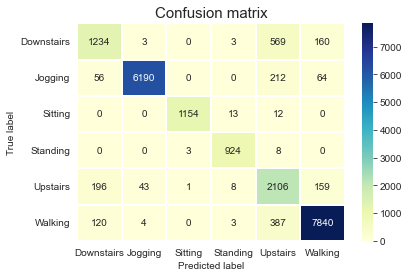

In [28]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

As it can be noticed from the confusion matrix, the two most common activities in our dataset i.e. Walking and Jogging are correctly classified with very high accuracy

# 2-Layer of LSTM with more hyperparameter tunning

In [29]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [30]:
# Initializing parameters
n_epochs = 100
n_batch = 32
n_classes = 6

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [31]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [32]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50, 48)            9984      
                                                                 
 batch_normalization (BatchN  (None, 50, 48)           192       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 50, 48)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                10368     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                      

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs,callbacks=[early_stopping])

Epoch 1/100
2684/2684 [==============================] - 71s 25ms/step - loss: 0.7643 - accuracy: 0.7992 - val_loss: 0.3881 - val_accuracy: 0.8551
Epoch 2/100
2684/2684 [==============================] - 67s 25ms/step - loss: 0.4065 - accuracy: 0.8548 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 3/100
2684/2684 [==============================] - 73s 27ms/step - loss: 0.3315 - accuracy: 0.8860 - val_loss: 0.2672 - val_accuracy: 0.9041
Epoch 4/100
2684/2684 [==============================] - 69s 26ms/step - loss: 0.2796 - accuracy: 0.9058 - val_loss: 0.1997 - val_accuracy: 0.9334
Epoch 5/100
2684/2684 [==============================] - 67s 25ms/step - loss: 0.2388 - accuracy: 0.9219 - val_loss: 0.1877 - val_accuracy: 0.9368
Epoch 6/100
2684/2684 [==============================] - 69s 26ms/step - loss: 0.2160 - accuracy: 0.9303 - val_loss: 0.1687 - val_accuracy: 0.9456
Epoch 7/100
2684/2684 [==============================] - 69s 26ms/step - loss: 0.1956 - accuracy: 0.9368 - val_loss: 0

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = n_batch, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

671/671 [==============================] - 7s 10ms/step - loss: 0.1520 - accuracy: 0.9598
Test Accuracy : 0.9598081111907959
Test Loss : 0.152006596326828


In [36]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

671/671 [==============================] - 6s 9ms/step
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1969
           1       0.99      0.99      0.99      6522
           2       1.00      0.98      0.99      1179
           3       0.99      0.99      0.99       935
           4       0.88      0.89      0.88      2513
           5       0.96      0.99      0.98      8354

    accuracy                           0.96     21472
   macro avg       0.96      0.94      0.95     21472
weighted avg       0.96      0.96      0.96     21472



671/671 [==============================] - 6s 9ms/step


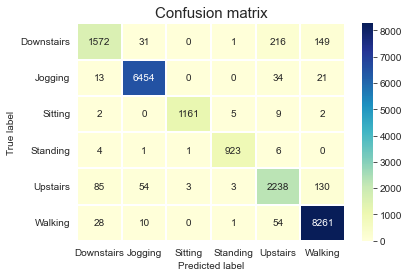

In [37]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2-layer LSTM with changed parameter values


In [38]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 64)            17408     
                                                                 
 batch_normalization_1 (Batc  (None, 50, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 50, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 48)                21696     
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 294       
                                      

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs,callbacks=[early_stopping])

Epoch 1/100
2684/2684 [==============================] - 86s 30ms/step - loss: 0.7707 - accuracy: 0.8131 - val_loss: 0.3574 - val_accuracy: 0.8680
Epoch 2/100
2684/2684 [==============================] - 78s 29ms/step - loss: 0.3428 - accuracy: 0.8815 - val_loss: 0.2868 - val_accuracy: 0.8986
Epoch 3/100
2684/2684 [==============================] - 78s 29ms/step - loss: 0.2583 - accuracy: 0.9145 - val_loss: 0.2072 - val_accuracy: 0.9292
Epoch 4/100
2684/2684 [==============================] - 79s 30ms/step - loss: 0.2113 - accuracy: 0.9312 - val_loss: 0.1679 - val_accuracy: 0.9450
Epoch 5/100
2684/2684 [==============================] - 84s 31ms/step - loss: 0.1841 - accuracy: 0.9399 - val_loss: 0.1453 - val_accuracy: 0.9522
Epoch 6/100
2684/2684 [==============================] - 75s 28ms/step - loss: 0.1676 - accuracy: 0.9463 - val_loss: 0.1392 - val_accuracy: 0.9562
Epoch 7/100
2684/2684 [==============================] - 80s 30ms/step - loss: 0.1526 - accuracy: 0.9519 - val_loss: 0

In [41]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = n_batch, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

671/671 [==============================] - 8s 12ms/step - loss: 0.1131 - accuracy: 0.9694
Test Accuracy : 0.9694485664367676
Test Loss : 0.1131342351436615


In [42]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob1 = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob1, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

671/671 [==============================] - 8s 11ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1969
           1       0.99      0.99      0.99      6522
           2       0.98      0.99      0.99      1179
           3       0.98      0.99      0.99       935
           4       0.93      0.88      0.91      2513
           5       0.98      0.99      0.98      8354

    accuracy                           0.97     21472
   macro avg       0.96      0.96      0.96     21472
weighted avg       0.97      0.97      0.97     21472



671/671 [==============================] - 7s 11ms/step


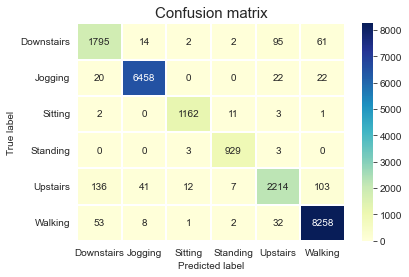

In [43]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# CNN-GRU

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Flatten, Dropout


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense

# Define the CNN-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=n_epochs, batch_size=n_batch, validation_data=(X_test, y_test),callbacks=[early_stopping])


Epoch 1/100
2684/2684 [==============================] - 54s 18ms/step - loss: 0.4507 - accuracy: 0.8413 - val_loss: 0.2395 - val_accuracy: 0.9152
Epoch 2/100
2684/2684 [==============================] - 49s 18ms/step - loss: 0.2609 - accuracy: 0.9122 - val_loss: 0.1735 - val_accuracy: 0.9407
Epoch 3/100
2684/2684 [==============================] - 49s 18ms/step - loss: 0.2133 - accuracy: 0.9296 - val_loss: 0.1486 - val_accuracy: 0.9498
Epoch 4/100
2684/2684 [==============================] - 49s 18ms/step - loss: 0.1885 - accuracy: 0.9382 - val_loss: 0.1875 - val_accuracy: 0.9379
Epoch 5/100
2684/2684 [==============================] - 49s 18ms/step - loss: 0.1738 - accuracy: 0.9431 - val_loss: 0.1210 - val_accuracy: 0.9613
Epoch 6/100
2684/2684 [==============================] - 50s 19ms/step - loss: 0.1648 - accuracy: 0.9460 - val_loss: 0.1253 - val_accuracy: 0.9611
Epoch 7/100
2684/2684 [==============================] - 50s 19ms/step - loss: 0.1542 - accuracy: 0.9502 - val_loss: 0

In [46]:
score = model.evaluate(X_test, y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

671/671 [==============================] - 4s 6ms/step - loss: 0.0926 - accuracy: 0.9701

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.0926441103219986, 0.970054030418396]


In [47]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob2 = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob2, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

671/671 [==============================] - 4s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1969
           1       0.99      0.99      0.99      6522
           2       0.99      0.98      0.98      1179
           3       0.97      0.99      0.98       935
           4       0.90      0.91      0.90      2513
           5       0.99      0.99      0.99      8354

    accuracy                           0.97     21472
   macro avg       0.96      0.96      0.96     21472
weighted avg       0.97      0.97      0.97     21472



671/671 [==============================] - 4s 6ms/step


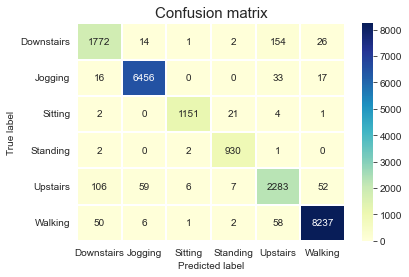

In [48]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Soft_Attention_Mechanism

In [49]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [58]:
# Define the soft attention mechanism layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, attention_dim):
        super(AttentionLayer, self).__init__()
        self.attention_dim = attention_dim
        self.W = tf.keras.layers.Dense(attention_dim, activation='tanh')
        self.u = tf.keras.layers.Dense(1, activation='softmax')

    def call(self, inputs):
        u_it = self.u(self.W(inputs))
        return tf.reduce_sum(inputs * u_it, axis=1)

In [59]:
# Define the LSTM model with a soft attention mechanism layer
def create_model(X_train):
    attention_dim = 128
    lstm_units = 64

    input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_layer1 = tf.keras.layers.LSTM(lstm_units, return_sequences=True)(input_layer)
    lstm_layer2 = tf.keras.layers.LSTM(lstm_units, return_sequences=True)(lstm_layer1)
    #lstm_layer3 = tf.keras.layers.LSTM(lstm_units, return_sequences=True)(lstm_layer2)
    attention_layer = AttentionLayer(attention_dim)(lstm_layer2)
    output_layer = tf.keras.layers.Dense(n_classes, activation='softmax')(attention_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [60]:
# y_train = pd.get_dummies(y_train.squeeze()).values
# # y_test = pd.get_dummies(y_test.squeeze()).values

In [61]:
print(y_train.shape)
print(y_train[1])


print(y_test.shape)
y_test[0]

(85886, 6)
[0. 0. 0. 0. 1. 0.]
(21472, 6)


array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [62]:
# Train the model and evaluate on the test set
model = create_model(X_train)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=n_batch, validation_data=(X_test, y_test),callbacks=[early_stopping])



Epoch 1/100
2684/2684 [==============================] - 113s 40ms/step - loss: 0.5148 - accuracy: 0.8189 - val_loss: 0.3387 - val_accuracy: 0.8789
Epoch 2/100
2684/2684 [==============================] - 104s 39ms/step - loss: 0.2836 - accuracy: 0.8971 - val_loss: 0.2325 - val_accuracy: 0.9202
Epoch 3/100
2684/2684 [==============================] - 107s 40ms/step - loss: 0.1918 - accuracy: 0.9337 - val_loss: 0.1547 - val_accuracy: 0.9479
Epoch 4/100
2684/2684 [==============================] - 108s 40ms/step - loss: 0.1486 - accuracy: 0.9500 - val_loss: 0.1419 - val_accuracy: 0.9524
Epoch 5/100
2684/2684 [==============================] - 108s 40ms/step - loss: 0.1249 - accuracy: 0.9572 - val_loss: 0.1480 - val_accuracy: 0.9493
Epoch 6/100
2684/2684 [==============================] - 109s 40ms/step - loss: 0.1064 - accuracy: 0.9635 - val_loss: 0.1058 - val_accuracy: 0.9650
Epoch 7/100
2684/2684 [==============================] - 108s 40ms/step - loss: 0.0931 - accuracy: 0.9679 - val_

In [63]:
score = model.evaluate(X_test, y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

671/671 [==============================] - 11s 17ms/step - loss: 0.1070 - accuracy: 0.9720

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.1070236787199974, 0.97201007604599]


In [64]:
from sklearn.metrics import classification_report

# Get the predicted class probabilities for the test set
y_pred_prob3 = model.predict(X_test)

# Get the predicted classes
y_pred = np.argmax(y_pred_prob3, axis=1)

# Convert the one-hot encoded labels back to their original form
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))

671/671 [==============================] - 13s 18ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1969
           1       0.99      0.99      0.99      6522
           2       1.00      0.99      0.99      1179
           3       0.98      0.99      0.99       935
           4       0.91      0.92      0.91      2513
           5       0.98      0.99      0.99      8354

    accuracy                           0.97     21472
   macro avg       0.96      0.96      0.96     21472
weighted avg       0.97      0.97      0.97     21472



671/671 [==============================] - 11s 17ms/step


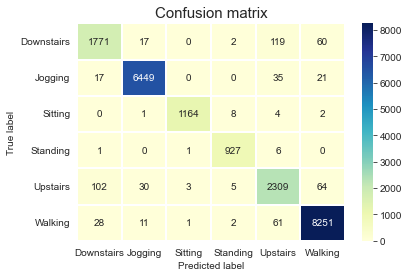

In [65]:
from sklearn import metrics

predictions = model.predict(X_test)
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()